Estimated scale parameter (σ): 8.986186393264498
Estimated location parameter (k): 0
Arithmetic Mean = 10.9747 m/s
Expected Value = 7.9638 m/s


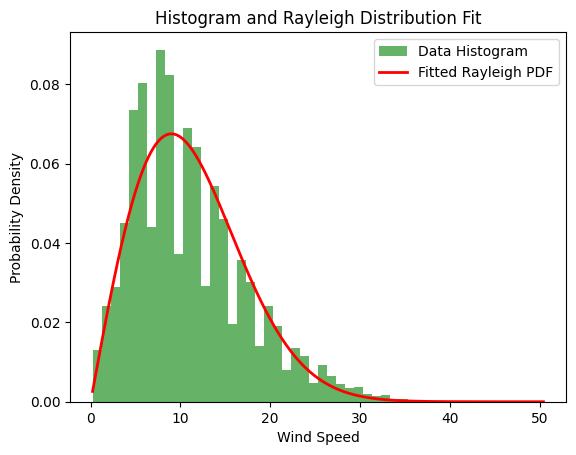

In [78]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, kstest, rayleigh



def Rayleigh_fit(Altitude, bin):
    # For CSV files
    #csv_file_path = 'path_to_your_file.csv'
    df = pd.read_csv('WindSpeed.csv')
    wind_speed_matrix = df.values
    # Assuming 'wind_speed_matrix' is your 2D array of wind speed data
    data = wind_speed_matrix.flatten()
    data = data[~np.isnan(data)]
    
    data_convert = data*(40/Altitude)**(-1/7)
    data_convert.sort()
    
    data_convert_nonzero = data_convert[data_convert > 0]
    param = rayleigh.fit(data_convert_nonzero, floc=0)
    loc, sigma = param[0], param[1]
    print(f"Estimated scale parameter (σ): {sigma}")
    print(f"Estimated location parameter (k): {loc}")
    mu = data_convert_nonzero.mean()
    mu2 = sigma*math.sqrt(math.pi)/2
    print(f"Arithmetic Mean = {mu:.4f} m/s")
    print(f"Expected Value = {mu2:.4f} m/s")
    
    # Step 8: Plot the fitted Rayleigh PDF
    x = np.linspace(data_convert_nonzero.min(), data_convert_nonzero.max(), 1000)
    pdf_rayleigh = rayleigh.pdf(x, loc=0, scale=sigma)
    plt.hist(data_convert_nonzero, bins=bin, density=True, alpha=0.6, color='g', label='Data Histogram')
    plt.plot(x, pdf_rayleigh, 'r-', linewidth=2, label='Fitted Rayleigh PDF')
    
    # Final touches
    plt.xlabel('Wind Speed')
    plt.ylabel('Probability Density')
    plt.title('Histogram and Rayleigh Distribution Fit')
    plt.legend()
    plt.show()
    
Rayleigh_fit(Altitude = 80, bin = 50)